<a href="https://colab.research.google.com/github/SylviaNice/7162856-G-rez-Git-et-GitHub/blob/main/Notebook_BottelNeck_final_synchro_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# 1. Nettoyage de l'environnement (efface toutes les variables en mémoire)

%reset -f

# Cette commande permet d'effacer toutes les variables et tous les objets de la mémoire, cela garantit un environnement de travail propre et reproductible, évitant ainsi que des variables d'analyses précédentes n'interfèrent avec l'exécution du code actuel.

In [35]:
# 2. Installation des bibliothèques

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Ce bloc importe les bibliothèques Python pour l'analyse de données : pandas pour la manipulation de DataFrames, matplotlib et seaborn pour la visualisation. J'ai également importé numpy pour les opérations mathématiques et désactivé les avertissements pour un affichage plus propre dans le notebook. L'option pd.set_option('display.max_columns', None) permet d'afficher toutes les colonnes d'un DataFrame, même nombreuses.

In [36]:
# 3. Importation des données

from google.colab import files
uploaded = files.upload()

Saving Fichier_erp.xlsx to Fichier_erp (1).xlsx
Saving Fichier_liaison.xlsx to Fichier_liaison (1).xlsx
Saving Fichier_web.xlsx to Fichier_web (1).xlsx


In [37]:
# 4. Chargement des 3 fichiers

erp_file = "Fichier_erp.xlsx"
web_file = "Fichier_web.xlsx"
liaison_file = "Fichier_liaison.xlsx"

In [38]:
# 5. Lecture des fichiers

erp_df = pd.read_excel(erp_file)
web_df = pd.read_excel(web_file)
liaison_df = pd.read_excel(liaison_file)

# Une fois les fichiers téléchargés, ce code les lit à l'aide de la bibliothèque pandas et les stocke dans des DataFrames. C'est la première étape pour convertir les données brutes en une structure exploitable.

In [39]:
# 6. Aperçu du fichier erp

display(erp_df.head())
print(erp_df.shape)
print(erp_df.dtypes)

# Cette étape d'exploration initiale est fondamentale. J'ai affiché les premières lignes (.head()) pour un aperçu visuel, vérifié la taille du jeu de données (.shape) pour confirmer le nombre de lignes et de colonnes, et examiné les types de données (.dtypes) pour m'assurer qu'ils sont corrects. Le fichier ERP contient 825 lignes et 5 colonnes avec des types de données appropriés pour l'analyse.

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


(825, 5)
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object


In [40]:
# 7. Aperçu du fichier liaison

display(liaison_df.head())
print(liaison_df.shape)
print(liaison_df.dtypes)

# J'ai affiché les premières lignes (.head()) pour un aperçu visuel, vérifié la taille du jeu de données (.shape) pour confirmer le nombre de lignes et de colonnes, et examiné les types de données (.dtypes) pour m'assurer qu'ils sont corrects. Le fichier liaison contient 825 lignes et 2 colonnes avec des types de données appropriés pour l'analyse.

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


(825, 2)
product_id     int64
id_web        object
dtype: object


In [41]:
# 8. Aperçu du fichier web

display(web_df.head())
print(web_df.shape)
print(web_df.dtypes)

# J'ai affiché les premières lignes (.head()) pour un aperçu visuel, vérifié la taille du jeu de données (.shape) pour confirmer le nombre de lignes et de colonnes, et examiné les types de données (.dtypes) pour m'assurer qu'ils sont corrects. Le fichier web contient 825 lignes et 28 colonnes avec des types de données appropriés pour l'analyse.

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,2018-06-07 14:27:25,NaN,Château du Couvent Pomerol 2017,NaN,publish,closed,closed,NaN,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,NaN,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,NaN,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,NaN,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,NaN,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,2020-01-25 13:08:16,NaN,Domaine de la Monardière Vacqueyras Vieilles V...,NaN,publish,closed,closed,NaN,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


(1513, 28)
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                   

In [42]:
# 9. Nettoyage du fichier erp

# Define as_str function
def as_str(x):
    if isinstance(x, pd.Series):
        return x.astype(str)
    return str(x)

erp_df = erp_df.copy()
erp_df['product_id'] = as_str(erp_df['product_id'])
erp_df['price'] = pd.to_numeric(erp_df['price'], errors='coerce').fillna(0).abs().round(2)
erp_df['stock_quantity'] = pd.to_numeric(erp_df.get('stock_quantity', 0), errors='coerce').fillna(0)
erp_df['onsale_web'] = as_str(erp_df.get('onsale_web', pd.Series(['']*len(erp_df)))).str.lower()
erp_df['stock_status'] = as_str(erp_df.get('stock_status', pd.Series(['']*len(erp_df)))).str.lower()
erp_before = len(erp_df)
erp_df = erp_df.drop_duplicates(subset=['product_id'], keep='first')
print(f'Doublons ERP supprimés: {erp_before - len(erp_df)}')

# Ce nettoyage standardise les types de données (IDs en texte, prix en numérique positif, stocks corrigés), uniformise les champs texte (onsale_web, stock_status), et supprime les doublons de produits.

Doublons ERP supprimés: 0


In [43]:
# 10. Nettoyage du fichier liaison

liaison_df = liaison_df.copy()
liaison_df['product_id'] = as_str(liaison_df['product_id'])
liaison_df['id_web']     = as_str(liaison_df['id_web'])

# supprimer les lignes vides
liaison_df = liaison_df.dropna(subset=['product_id','id_web'])

# ⚠️ correction clé : on force l’unicité sur product_id ET sur id_web
liaison_before = len(liaison_df)
liaison_df = liaison_df.drop_duplicates(subset=['product_id'], keep='first')
liaison_df = liaison_df.drop_duplicates(subset=['id_web'], keep='first')
print(f'Doublons LIAISON supprimés: {liaison_before - len(liaison_df)}')

Doublons LIAISON supprimés: 90


In [44]:
# 11. Nettoyage du fichier web

# Define norm_key function (example - replace with actual logic if needed)
def norm_key(x):
    if isinstance(x, pd.Series):
        return x.astype(str).str.lower().str.strip()
    return str(x).lower().strip()

web_df = web_df.copy()
web_df['sku']         = norm_key(web_df['sku'])
web_df['post_type']   = as_str(web_df.get('post_type', pd.Series(['']*len(web_df)))).str.lower()
web_df['post_status'] = as_str(web_df.get('post_status', pd.Series(['']*len(web_df)))).str.lower()
web_df['total_sales'] = pd.to_numeric(web_df.get('total_sales', 0), errors='coerce').fillna(0)

# garder uniquement les produits publiés avec un sku valide
web_df = web_df[(web_df['post_type']=='product') & (web_df['post_status']=='publish')]
web_df = web_df.dropna(subset=['sku'])

# ⚠️ correction clé : forcer l’unicité sur sku
web_before = len(web_df)
web_df = web_df.drop_duplicates(subset=['sku'], keep='first')
print(f'Doublons WEB supprimés: {web_before - len(web_df)}')

# Ce code nettoie le fichier WEB en uniformisant les identifiants et statuts, gardant uniquement les produits publiés,supprimant les doublons, garantissant que les ventes (total_sales) soient bien numériques.

Doublons WEB supprimés: 1


In [45]:
# 12. Fusion des 3 fichiers erp, liaison et web

erp_liaison = pd.merge(erp_df, liaison_df, on='product_id', how='left')
final = pd.merge(erp_liaison, web_df, left_on='id_web', right_on='sku', how='left')
print('ERP:', len(erp_df), '| LIAISON:', len(liaison_df), '| WEB:', len(web_df), '| FINAL:', len(final))
print('ERP sans correspondance LIAISON:', final['id_web'].isna().sum())
print('ERP+LIAISON sans correspondance WEB:', final['id_web'].notna().sum() - final['sku'].notna().sum())

# Ce code assemble les trois tables (ERP, LIAISON, WEB) et fait un contrôle qualité : Combien de produits ERP n’ont pas de liaison ? Combien de produits ERP liés n’ont pas de correspondance côté WEB ?

ERP: 825 | LIAISON: 735 | WEB: 715 | FINAL: 825
ERP sans correspondance LIAISON: 90
ERP+LIAISON sans correspondance WEB: 20


In [46]:
# 1. Incohérence : Produits dans l'ERP non trouvés sur le Web, et vice-versa

# Convert product_id in liaison_df to object type to match erp_df
liaison_df['product_id'] = liaison_df['product_id'].astype(str)

erp_only = pd.merge(erp_df, liaison_df, on='product_id', how='left', indicator=True).query('_merge == "left_only"').copy()
web_only = pd.merge(liaison_df, web_df, left_on='id_web', right_on='sku', how='left', indicator=True).query('_merge == "left_only"').copy()

print("\n### Incohérence n°1 : Désynchronisation ERP / Web")
print(f"Nombre de produits dans l'ERP sans correspondance sur le Web : {len(erp_only)}")
print(f"Nombre de produits sur le Web sans correspondance dans l'ERP : {len(web_only)}")
print("Exemples de produits dans l'ERP non trouvés sur le Web (ID Produit, Nom):")
display(erp_only.head(3))
print("\nExemples de produits sur le Web non trouvés dans l'ERP (ID Web, Nom):")
display(web_only.head(3))


### Incohérence n°1 : Désynchronisation ERP / Web
Nombre de produits dans l'ERP sans correspondance sur le Web : 90
Nombre de produits sur le Web sans correspondance dans l'ERP : 20
Exemples de produits dans l'ERP non trouvés sur le Web (ID Produit, Nom):


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
49,4090,0,73.0,6,outofstock,NaN,left_only
50,4092,0,47.0,6,outofstock,NaN,left_only
119,4195,0,14.1,0,outofstock,NaN,left_only



Exemples de produits sur le Web non trouvés dans l'ERP (ID Web, Nom):


,product_id,id_web,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
186,4289,13771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
228,4568,15065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
231,4584,14785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [47]:
# Fusionner erp_df et liaison_df sur 'product_id' (inner join)
df_merged_erp_liaison = pd.merge(erp_df, liaison_df, on='product_id', how='inner')
print("Premières lignes de df_merged_erp_liaison (ERP + Liaison nettoyée):")
display(df_merged_erp_liaison.head())
print("\nInformations sur df_merged_erp_liaison:")
display(df_merged_erp_liaison.info())

# Fusionner df_merged_erp_liaison et web_df sur 'id_web' et 'sku' (inner join)
final_merged = pd.merge(df_merged_erp_liaison, web_df, left_on='id_web', right_on='sku', how='inner')
# Afficher les premières lignes et informations du DataFrame fusionné final et nettoyé
print("\nPremières lignes de final_merged (ERP + Liaison + Web nettoyés):")
display(final_merged.head())
print("\nInformations sur final_merged:")
display(final_merged.info())

# Vérification des jointures
print(f"\nNombre de produits dans erp_df : {len(erp_df)}")
print(f"Nombre de produits avec un id_web dans liaison_df : {len(liaison_df)}")
print(f"Nombre de produits 'product' uniques dans web_df : {len(web_df)}")
print(f"Nombre de produits communs après fusion (lignes dans final_merged) : {len(final_merged)}")

Premières lignes de df_merged_erp_liaison (ERP + Liaison nettoyée):


,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815



Informations sur df_merged_erp_liaison:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      735 non-null    object 
 1   onsale_web      735 non-null    object 
 2   price           735 non-null    float64
 3   stock_quantity  735 non-null    int64  
 4   stock_status    735 non-null    object 
 5   id_web          735 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 34.6+ KB


None


Premières lignes de final_merged (ERP + Liaison + Web nettoyés):


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,19815,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0



Informations sur final_merged:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             715 non-null    object        
 1   onsale_web             715 non-null    object        
 2   price                  715 non-null    float64       
 3   stock_quantity         715 non-null    int64         
 4   stock_status           715 non-null    object        
 5   id_web                 715 non-null    object        
 6   sku                    715 non-null    object        
 7   virtual                715 non-null    int64         
 8   downloadable           715 non-null    int64         
 9   rating_count           715 non-null    int64         
 10  average_rating         715 non-null    float64       
 11  total_sales            715 non-null    float64       
 12  tax_status             715 non-n

None


Nombre de produits dans erp_df : 825
Nombre de produits avec un id_web dans liaison_df : 735
Nombre de produits 'product' uniques dans web_df : 715
Nombre de produits communs après fusion (lignes dans final_merged) : 715


In [48]:
# Fusion ERP + LIAISON + WEB
erp_liaison = pd.merge(erp_df, liaison_df, on='product_id', how='left')
final = pd.merge(erp_liaison, web_df, left_on='id_web', right_on='sku', how='left')

# Comptage produits ERP absents du WEB
absents_web = final[final['sku'].isna()]
print("Produits ERP absents du WEB :", len(absents_web))

Produits ERP absents du WEB : 110


In [49]:
# 13. Calcul du CA

final['CA_sales'] = final['price'] * final['total_sales']
mask_onsale = final['onsale_web'].isin(['1','true','yes','y','vrai','oui'])
ca_sales_onsale = round(float(final.loc[mask_onsale, 'CA_sales'].sum()), 2)
print('CA calculé (produits en promo):', ca_sales_onsale)

# Le montant du CA s'élève à 70568,60 euros.

CA calculé (produits en promo): 70568.6


In [50]:
# 14. Charger les fichiers bruts (sans aucun nettoyage) pour la détection des incohérences

erp_raw = pd.read_excel("Fichier_erp.xlsx")
liaison_raw = pd.read_excel("Fichier_liaison.xlsx")
web_raw = pd.read_excel("Fichier_web.xlsx")

# J'ai rechargé les fichiers bruts pour décrire les incohérences trouvées dans les 3 fichiers.

In [51]:
# 15. Détection des incohérences du fichier erp

# 15.1. Incohérences dans les stocks et dans les prix

print("=== INCOHERENCES ERP (fichier brut) ===")
print("Prix négatifs :", len(pd.to_numeric(erp_raw['price'], errors='coerce')[lambda x: x < 0]))
print("Stocks négatifs :", len(pd.to_numeric(erp_raw['stock_quantity'], errors='coerce')[lambda x: x < 0]))

stocks_negatifs = erp_raw[erp_raw['stock_quantity'] < 0]
print("Stocks négatifs :")
print(stocks_negatifs)

prix_négatifs = erp_raw[erp_raw['price'] < 0]
print("Prix négatifs :")
print(prix_négatifs)

# Deux incohérences de prix et de stock ont été trouvées dans le fichier erp. Il s'agissait de stocks négatifs pour deux produits et de prix négatifs pour deux produits. Les prix négatifs ont été corrigés en valeur absolue et les stocks à valeur négative ont été remis à zéro.

=== INCOHERENCES ERP (fichier brut) ===
Prix négatifs : 2
Stocks négatifs : 2
Stocks négatifs :
     product_id  onsale_web  price  stock_quantity stock_status
449        4973           0   10.0              -1   outofstock
573        5700           1   44.5              -1   outofstock
Prix négatifs :
     product_id  onsale_web  price  stock_quantity stock_status
469        5017           0   -8.0               0   outofstock
739        6594           0   -1.0             192      instock


In [52]:
# 15.3. Incohérences entre la quantité en stock et le statut du stock

erp_raw['stock_status'] = erp_raw['stock_status'].astype(str).str.lower().str.strip()
erp_raw['stock_quantity'] = pd.to_numeric(erp_raw['stock_quantity'], errors='coerce')

incoh_stock = erp_raw[
    ((erp_raw['stock_status']=='instock') & (erp_raw['stock_quantity'] <= 0)) |
    ((erp_raw['stock_status']=='outofstock') & (erp_raw['stock_quantity'] > 0))
]

print("Nombre d'incohérences stock :", len(incoh_stock))
print(incoh_stock[['product_id','stock_quantity','stock_status']].head(20))

# Dans le fichier erp, il y a 6 incohérences constatées entre la quantité indiquée en stock et le statut du stock. Si une quantité en stock est positive, elle ne peut pas avoir un statut outofstock. Si une quantité en stock est négative, elle ne peut pas avoir un statut instock.

Nombre d'incohérences stock : 6
     product_id  stock_quantity stock_status
19         4055               1   outofstock
49         4090               6   outofstock
50         4092               6   outofstock
443        4954               0      instock
630        5826              12   outofstock
696        6125              48   outofstock


In [53]:
# 16. Détection des incohérences du fichier liaison

print("=== INCOHERENCES LIAISON (fichier brut) ===")
print("id_web non conformes :", len(liaison_raw[~liaison_raw['id_web'].astype(str).str.fullmatch(r'\d{5}(-\d+)?', na=False)]))
print("Doublons product_id :", liaison_raw.duplicated(subset=['product_id']).sum())
print("Doublons id_web :", liaison_raw.duplicated(subset=['id_web']).sum())

=== INCOHERENCES LIAISON (fichier brut) ===
id_web non conformes : 133
Doublons product_id : 0
Doublons id_web : 90


In [54]:
# 17. Détection des incohérences du fichier web

print("=== INCOHERENCES WEB (fichier brut) ===")
print("Doublons sku :", web_raw.duplicated(subset=['sku']).sum())
print("SKU non conformes :", len(web_raw[~web_raw['sku'].astype(str).str.fullmatch(r'\d{5}(-\d+)?', na=False)]))
print("Hors critères type/status :", len(web_raw[(web_raw['post_type'].str.lower()!='product') | (web_raw['post_status'].str.lower()!='publish')]))

=== INCOHERENCES WEB (fichier brut) ===
Doublons sku : 798
SKU non conformes : 169
Hors critères type/status : 797


In [55]:
# 17.1. Cellules "bon-cadeau-25-euros" trouvées dans la colonne sku

print("=== Incohérence SKU : bon cadeau ===")
print(web_raw[web_raw['sku'].str.contains("bon", case=False, na=False)][['sku']])

=== Incohérence SKU : bon cadeau ===
                     sku
196  bon-cadeau-25-euros
382  bon-cadeau-25-euros


In [56]:
# 17.2. Détection des sku finissant par "-1" au lieu de pas d'indice

print(web_raw[web_raw['sku'].astype(str).str.endswith('-1')][['sku']])
print(liaison_raw[liaison_raw['id_web'].astype(str).str.endswith('-1')][['id_web']])

# Deux indices aux numéros sku ont été trouvés, il s'agit d'une anomalie à résoudre en supprimant les indices qui n'ont pas lieu d'être.

         sku
490  13127-1
503  13127-1
      id_web
822  13127-1
823  14680-1


In [57]:
# 18. Détection des outliers dans les prix

prices = final['price'].dropna().astype(float)
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

outliers = final[(final['price'] < low) | (final['price'] > high)][[
    'product_id','id_web','sku','price','total_sales','onsale_web','stock_status'
]].sort_values('price', ascending=False)

print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}, Seuil bas={low:.2f}, Seuil haut={high:.2f}")
print(f"Nombre d'outliers détectés: {len(outliers)}")
outliers.head(37)

# 37 outliers ont été trouvés qui correspondent à des vins qui ont des prix élevés (vin de luxe).

Q1=14.60, Q3=42.00, IQR=27.40, Seuil bas=-26.50, Seuil haut=83.10
Nombre d'outliers détectés: 37


,product_id,id_web,sku,price,total_sales,onsale_web,stock_status
208,4352,15940,15940,225.0,5.0,1,outofstock
460,5001,14581,14581,217.5,0.0,1,instock
635,5892,14983,14983,191.3,3.0,1,instock
227,4402,3510,3510,176.0,13.0,1,instock
598,5767,15185,15185,175.0,0.0,1,instock
230,4406,7819,7819,157.0,0.0,1,instock
242,4594,NaN,NaN,144.0,NaN,1,outofstock
411,4904,14220,14220,137.0,5.0,1,instock
697,6126,14923,14923,135.0,2.0,1,instock
210,4355,12589,12589,126.5,11.0,1,instock


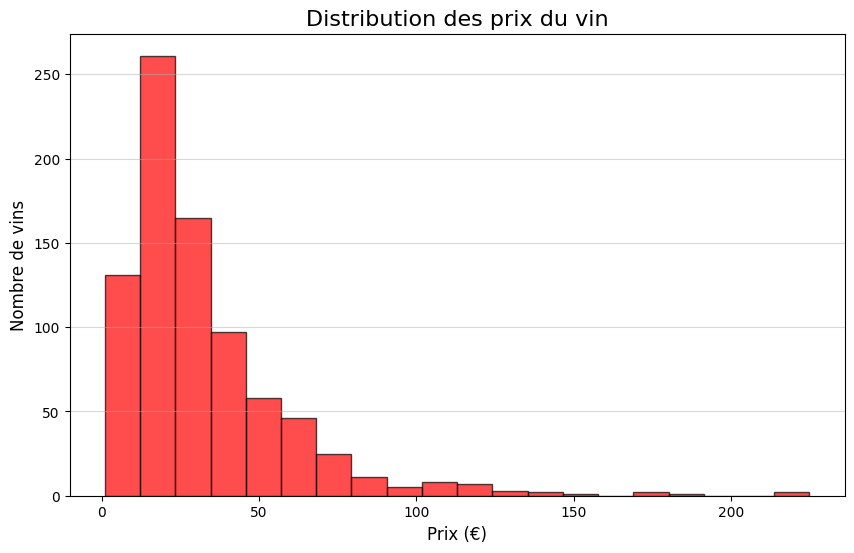

In [58]:
# 19. Distribution des prix du vin

plt.figure(figsize=(10, 6))
plt.hist(final['price'], bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title("Distribution des prix du vin", fontsize=16)
plt.xlabel("Prix (€)", fontsize=12)
plt.ylabel("Nombre de vins", fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

# L'histogramme confirme bien la présence d'outliers.

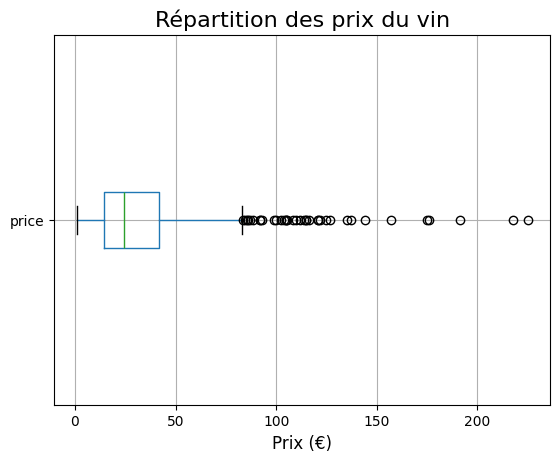

In [59]:
# 20. Représentation graphique des outliers dans les prix du vin

final.boxplot(column="price", vert=False)
plt.title("Répartition des prix du vin", fontsize=16)
plt.xlabel("Prix (€)", fontsize=12)
plt.show()

# La boîte à moustache confirme la présence de ces outliers, qui correspondent à des vins de luxe plus chers.

In [60]:
# 1. Incohérence : Produits dans l'ERP non trouvés sur le Web, et vice-versa

erp_only = pd.merge(erp_df, liaison_df, on='product_id', how='left', indicator=True).query('_merge == "left_only"').copy()
web_only = pd.merge(liaison_df, web_df, left_on='id_web', right_on='sku', how='left', indicator=True).query('_merge == "left_only"').copy()

print("\n### Incohérence n°1 : Désynchronisation ERP / Web")
print(f"Nombre de produits dans l'ERP sans correspondance sur le Web : {len(erp_only)}")
print(f"Nombre de produits sur le Web sans correspondance dans l'ERP : {len(web_only)}")
print("Exemples de produits dans l'ERP non trouvés sur le Web (ID Produit, Nom):")
display(erp_only.head(3))
print("\nExemples de produits sur le Web non trouvés dans l'ERP (ID Web, Nom):")
display(web_only.head(3))

# 2. Incohérence : Incohérences Quantité en Stock / Statut du Stock

stock_inconsistencies = final[(final['stock_quantity'] > 0) & (final['stock_status'] == 'outofstock')]
print("\n### Incohérence n°2 : Incohérences Quantité/Statut du Stock")
print(f"Nombre de produits avec une incohérence de stock : {len(stock_inconsistencies)}")
print("\nExemples de produits avec des incohérences de stock:")
display(stock_inconsistencies[['product_id', 'post_title', 'stock_quantity', 'stock_status']].head())


### Incohérence n°1 : Désynchronisation ERP / Web
Nombre de produits dans l'ERP sans correspondance sur le Web : 90
Nombre de produits sur le Web sans correspondance dans l'ERP : 20
Exemples de produits dans l'ERP non trouvés sur le Web (ID Produit, Nom):


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
49,4090,0,73.0,6,outofstock,NaN,left_only
50,4092,0,47.0,6,outofstock,NaN,left_only
119,4195,0,14.1,0,outofstock,NaN,left_only



Exemples de produits sur le Web non trouvés dans l'ERP (ID Web, Nom):


,product_id,id_web,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
186,4289,13771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
228,4568,15065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
231,4584,14785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only



### Incohérence n°2 : Incohérences Quantité/Statut du Stock
Nombre de produits avec une incohérence de stock : 5

Exemples de produits avec des incohérences de stock:


,product_id,post_title,stock_quantity,stock_status
19,4055,Pierre Jean Villa Condrieu Jardin Suspendu 2018,1,outofstock
49,4090,NaN,6,outofstock
50,4092,NaN,6,outofstock
630,5826,Agnès Levet Côte Rôtie Améthyste 2017,12,outofstock
696,6125,NaN,48,outofstock
